In [10]:
import pandas as pd

In [5]:
raw_df = pd.read_csv('datatraining.txt')

In [6]:
raw_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [8]:
df = raw_df[['CO2','Humidity','Occupancy']].copy()
df.head()

,CO2,Humidity,Occupancy
1,721.25,27.2720,1
2,714.00,27.2675,1
3,713.50,27.2450,1
4,708.25,27.2000,1
5,704.50,27.2000,1


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly_svm = Pipeline([('poly_feat',PolynomialFeatures(degree=3)),
                     ('scaler',StandardScaler()),
                     ('svm',LinearSVC(C=8,loss='hinge'))])

X = df[['CO2','Humidity']].to_numpy()
y = df[['Occupancy']].to_numpy()

In [16]:
poly_svm.fit(X,y)

/Users/ndeen/opt/anaconda3/envs/sandbox/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ndeen/opt/anaconda3/envs/sandbox/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=8, loss='hinge'))])

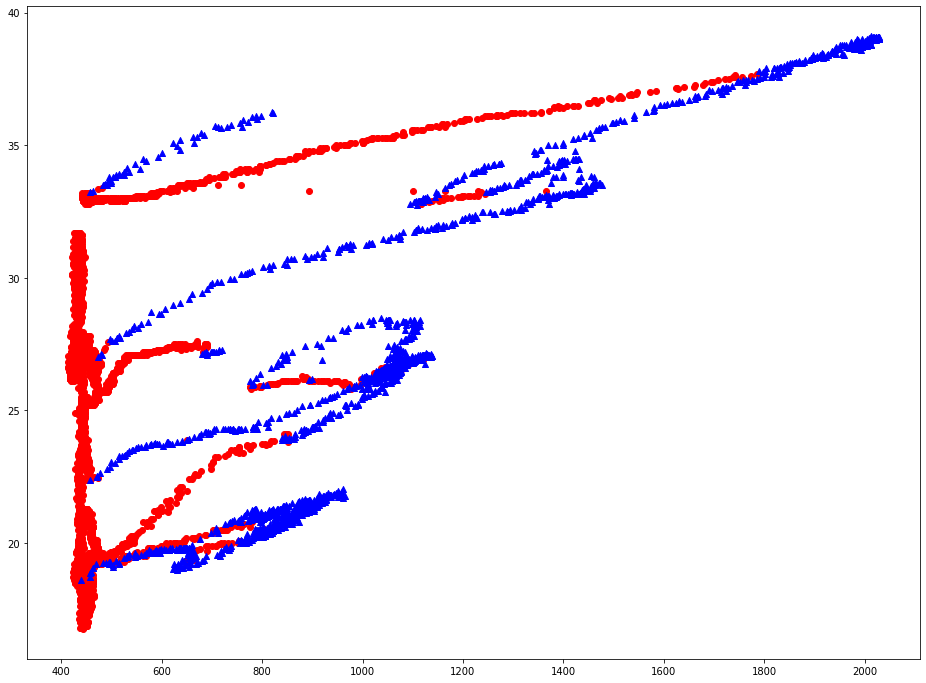

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))

# Separate observations for plotting
X_1 = X[[i for i in range(len(y)) if y[i] == 1],:]
X_0 = X[[i for i in range(len(y)) if y[i] == 0],:]

# Make scatterplots
neg_class = plt.scatter(X_0[:,0], X_0[:,1], marker='o', color='r')
pos_class = plt.scatter(X_1[:,0], X_1[:,1], marker='^', color='b')

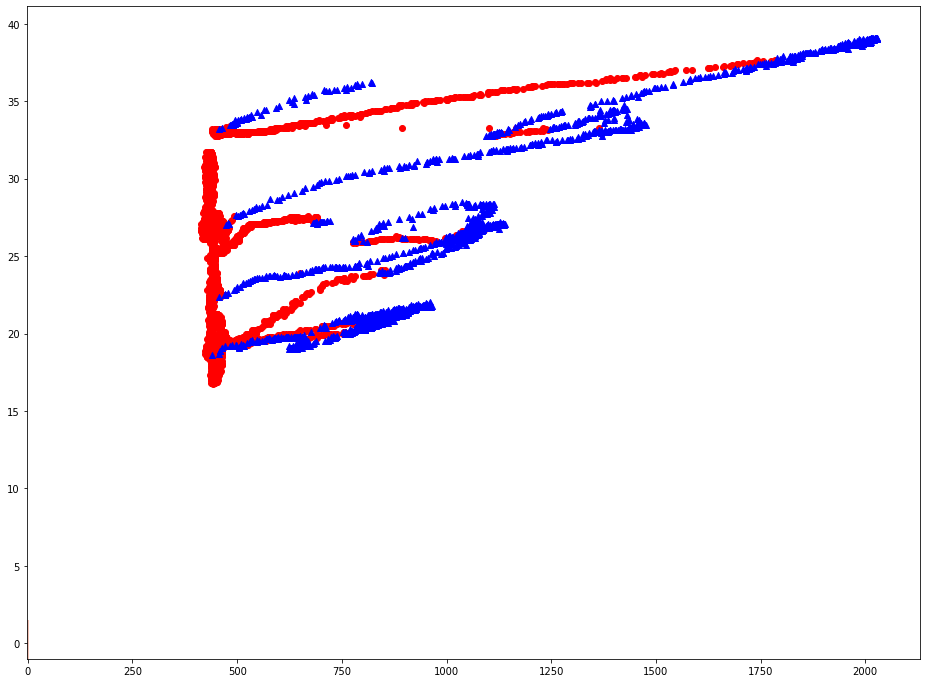

In [19]:
import numpy as np

# Plot the decision boundary, use a meshgrid
x_min = -2
x_max = 2.5
y_min = -1

y_max = 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,12))
plt.contourf(xx, yy, Z, cmap='RdBu', alpha = 0.5)

# Make scatterplots
neg_class = plt.scatter(X_0[:,0], X_0[:,1], marker='o', color='r')
pos_class = plt.scatter(X_1[:,0], X_1[:,1], marker='^', color='b')
